In [1]:
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [4]:
Diamonds.carat.value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.67       1
3.40       1
5.01       1
3.22       1
3.02       1
Name: carat, Length: 273, dtype: int64

In [21]:
x = Diamonds[['carat', 'cutR', 'colorR', 'clarityR']]

In [23]:
y = Diamonds['price']

In [24]:
x_train, x_test, y_train, y_test = 
    train_test_split(x,y, test_size = .4, random_state=101)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [36]:
Diamonds.value_counts("cutR")

cutR
0    21551
1    13791
2    12082
3     4906
4     1610
dtype: int64

In [7]:
def cut_recode (series): 
    if series == "Ideal": 
        return 0
    if series == "Premium": 
        return 1
    if series == "Very Good": 
        return 2
    if series == "Good": 
        return 3
    if series == "Fair": 
        return 4

Diamonds['cutR'] = Diamonds['cut'].apply(cut_recode)

In [11]:
Diamonds.value_counts("colorR")

colorR
0    11292
1     9797
2     9542
3     8304
4     6775
5     5422
6     2808
dtype: int64

In [10]:
def color_recode (series): 
    if series == "G": 
        return 0
    if series == "E": 
        return 1
    if series == "F": 
        return 2
    if series == "H": 
        return 3
    if series == "D": 
        return 4
    if series == "I": 
        return 5
    if series == "J": 
        return 6

Diamonds['colorR'] = Diamonds['color'].apply(color_recode)

In [14]:
Diamonds.value_counts("clarityR")

clarityR
0    13065
1    12258
2     9194
3     8171
4     5066
5     3655
6     1790
7      741
dtype: int64

In [13]:
def clarity_recode (series): 
    if series == "SI1": 
        return 0
    if series == "VS2": 
        return 1
    if series == "SI2": 
        return 2
    if series == "VS1": 
        return 3
    if series == "VVS2": 
        return 4
    if series == "VVS1": 
        return 5
    if series == "IF": 
        return 6
    if series == "I1": 
        return 7

Diamonds['clarityR'] = Diamonds['clarity'].apply(clarity_recode)

In [15]:
Diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 31126 to 15042
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   carat     53940 non-null  float64 
 1   cut       53940 non-null  category
 2   color     53940 non-null  category
 3   clarity   53940 non-null  category
 4   depth     53940 non-null  float64 
 5   table     53940 non-null  float64 
 6   price     53940 non-null  int64   
 7   x         53940 non-null  float64 
 8   y         53940 non-null  float64 
 9   z         53940 non-null  float64 
 10  cutR      53940 non-null  category
 11  colorR    53940 non-null  category
 12  clarityR  53940 non-null  category
dtypes: category(6), float64(6), int64(1)
memory usage: 3.6 MB


In [18]:
lm = LinearRegression()

In [25]:
lm.fit(x_train, y_train)

LinearRegression()

In [17]:
Diamonds.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)

In [26]:
predictions = lm.predict(x_test)
predictions

array([ 1580.47128684,  2072.37603179,  2411.0852803 , ...,
        2011.98538839,   643.01010563, 10310.6363118 ])

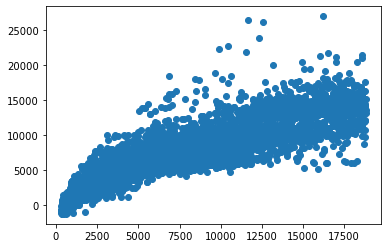

In [27]:
plt.scatter(y_test, predictions)

In [28]:
print("Score:", lm.score(x_test, y_test))

Score: 0.8675799538645071


In [ ]:
#Model is accurate ~86.76% of the time.

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [33]:
kfold = KFold(5, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     1     2 ... 53937 53938 53939], test: [   10    12    23 ... 53906 53911 53913]
train: [    0     1     4 ... 53936 53938 53939], test: [    2     3     8 ... 53934 53935 53937]
train: [    1     2     3 ... 53937 53938 53939], test: [    0    26    29 ... 53922 53933 53936]
train: [    0     2     3 ... 53937 53938 53939], test: [    1     4     5 ... 53927 53930 53931]
train: [    0     1     2 ... 53935 53936 53937], test: [    9    14    15 ... 53929 53938 53939]


C:\Users\olver\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [34]:
print(cross_val_score(lm, x,y, cv=5))

[0.86562807 0.86445128 0.86308226 0.8655198  0.86107828]
